# **TASK-1**
# **PREDICTION USING SUPERVISED ML**

*PREDICT THE PERCENTAGE OF AN STUDENT BASED ON THE NO. OF STUDY HOURS.*

***BY- KHYATI SINGH***

**IMPORTING THE LIBRARIES**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

**FILE IMPORT**

In [29]:
dataset = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

**PRINTING THE DATASET**

In [30]:
print(dataset)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


**DESCRIPTION OF THE DATASET**

In [31]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**CHECKING FOR NULL VALUES IN THE DATASET**

In [32]:
dataset.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


**DATA VISUALIZATION**

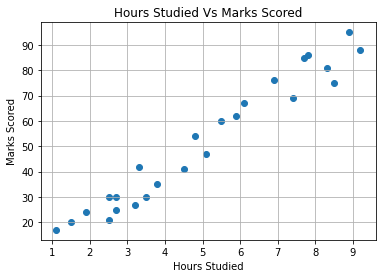

In [33]:
plt.scatter(y= dataset['Scores'], x= dataset['Hours'])
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.title('Hours Studied Vs Marks Scored')
plt.grid()
plt.show()

The above graph shows the relationship between the hours studied and marks scored by the student.

**Lets plot a regression line to show the correlation between the 'Hours Studied' and 'Marks Scored'.**

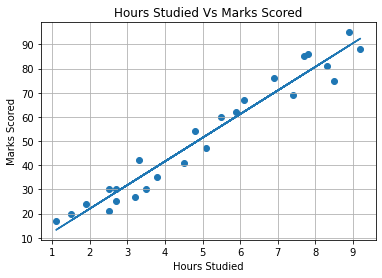

In [34]:
from scipy import stats
x= dataset['Hours'] 
y= dataset['Scores']
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.title('Hours Studied Vs Marks Scored')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.grid()
plt.show()


# **TRAINING THE MODEL**

***1. Splitting the data***

In [35]:
# Defining x and y from the Dataset
x = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values

# Spliting the Dataset in two
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

***2.Fitting the data into the model***

In [36]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(train_x, train_y)
print("Model Trained")


Model Trained


# **PREDICTING THE MARKS**

In [37]:
pred_y = regression.predict(val_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_x], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# **COMPARING THE ACTUAL MARKS WITH THE PREDICTED MARKS**

In [38]:
dataset = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})  
dataset

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


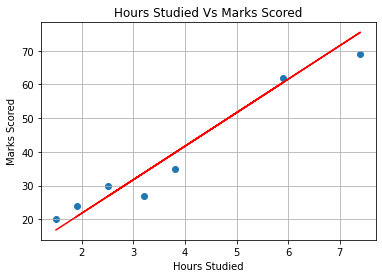

In [39]:
plt.scatter(x=val_x, y=val_y)
plt.plot(val_x, pred_y,color="red")
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.title('Hours Studied Vs Marks Scored')
plt.grid()
plt.show()

# **PREDICTING THE SCORE**

***What will be predicted score if a student studies for 9.25 hrs/ day?***

In [41]:
hours = 9.25
pred = regression.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hours per day is",pred[0])

The predicted score if a student studies for 9.25 hours per day is 93.89272889341652
